# Indian Liver Patient Prediction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [3]:
liver_df=pd.read_csv("/content/drive/MyDrive/BIA /Indian Liver Patient/indian_liver_patient.csv")

In [4]:
liver_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
liver_df.shape

(583, 11)

In [6]:
liver_df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [8]:
liver_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [9]:
liver_df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


Here is the observation from the dataset:

1) Only gender is non-numeric veriable. All others are numeric.

2) There are 10 features and 1 output - dataset. Value 1 indicates that the patient has liver disease and 2 indicates the patient does not have liver disease.

# EDA

Finding Null Value and treating them

In [11]:
liver_df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

The only data that is null is the Albumin_and_Globulin_Ratio - Only 4 rows are null.¶


<Axes: xlabel='Albumin_and_Globulin_Ratio', ylabel='Density'>

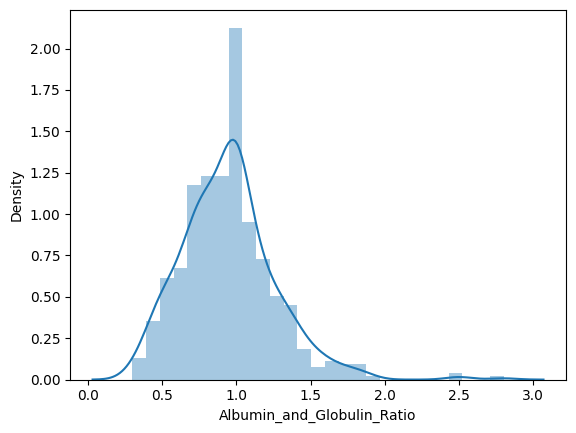

In [13]:
sns.distplot(liver_df['Albumin_and_Globulin_Ratio'])


In [14]:
liver_df['Albumin_and_Globulin_Ratio']=liver_df['Albumin_and_Globulin_Ratio'].fillna(liver_df['Albumin_and_Globulin_Ratio'].mean())

In [15]:
liver_df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

Checking For duplicate values


In [21]:
liver_df.duplicated().sum()

13

In [22]:
liver_df=liver_df.drop_duplicates()


In [23]:
liver_df.duplicated().sum()

0

In [24]:
liver_df.shape

(570, 11)

After removing the duplicates now there are 570 rows and 11 columns¶


Checking Imbalace Data


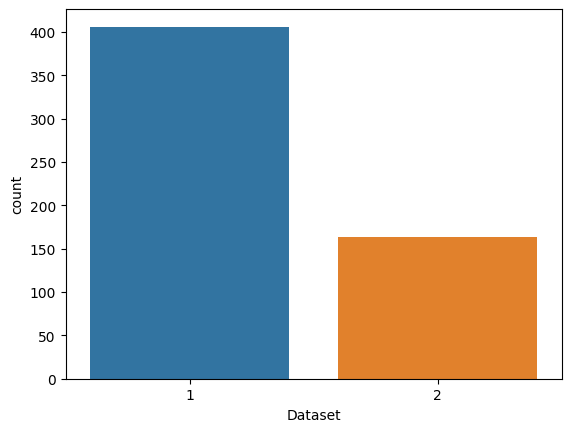

In [29]:
sns.countplot(x='Dataset',data=liver_df)
plt.show()

In [30]:
liver_df['Dataset'].value_counts()

1    406
2    164
Name: Dataset, dtype: int64

# Data Visualization

Checking Gender Column Distribution

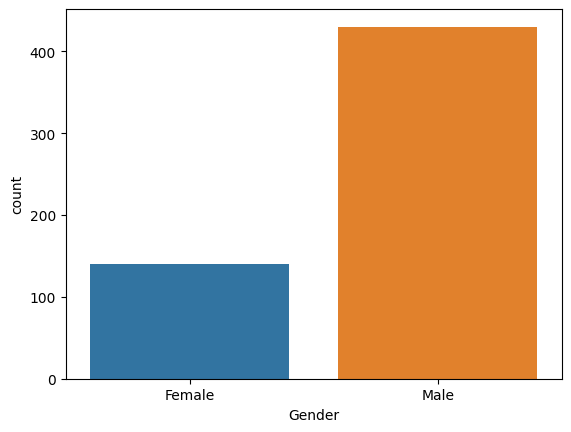

In [31]:
sns.countplot(x='Gender',data=liver_df)
plt.show()

In [32]:
liver_df['Gender'].value_counts()

Male      430
Female    140
Name: Gender, dtype: int64

There are 430 Male and 140 Female



Pair Plot

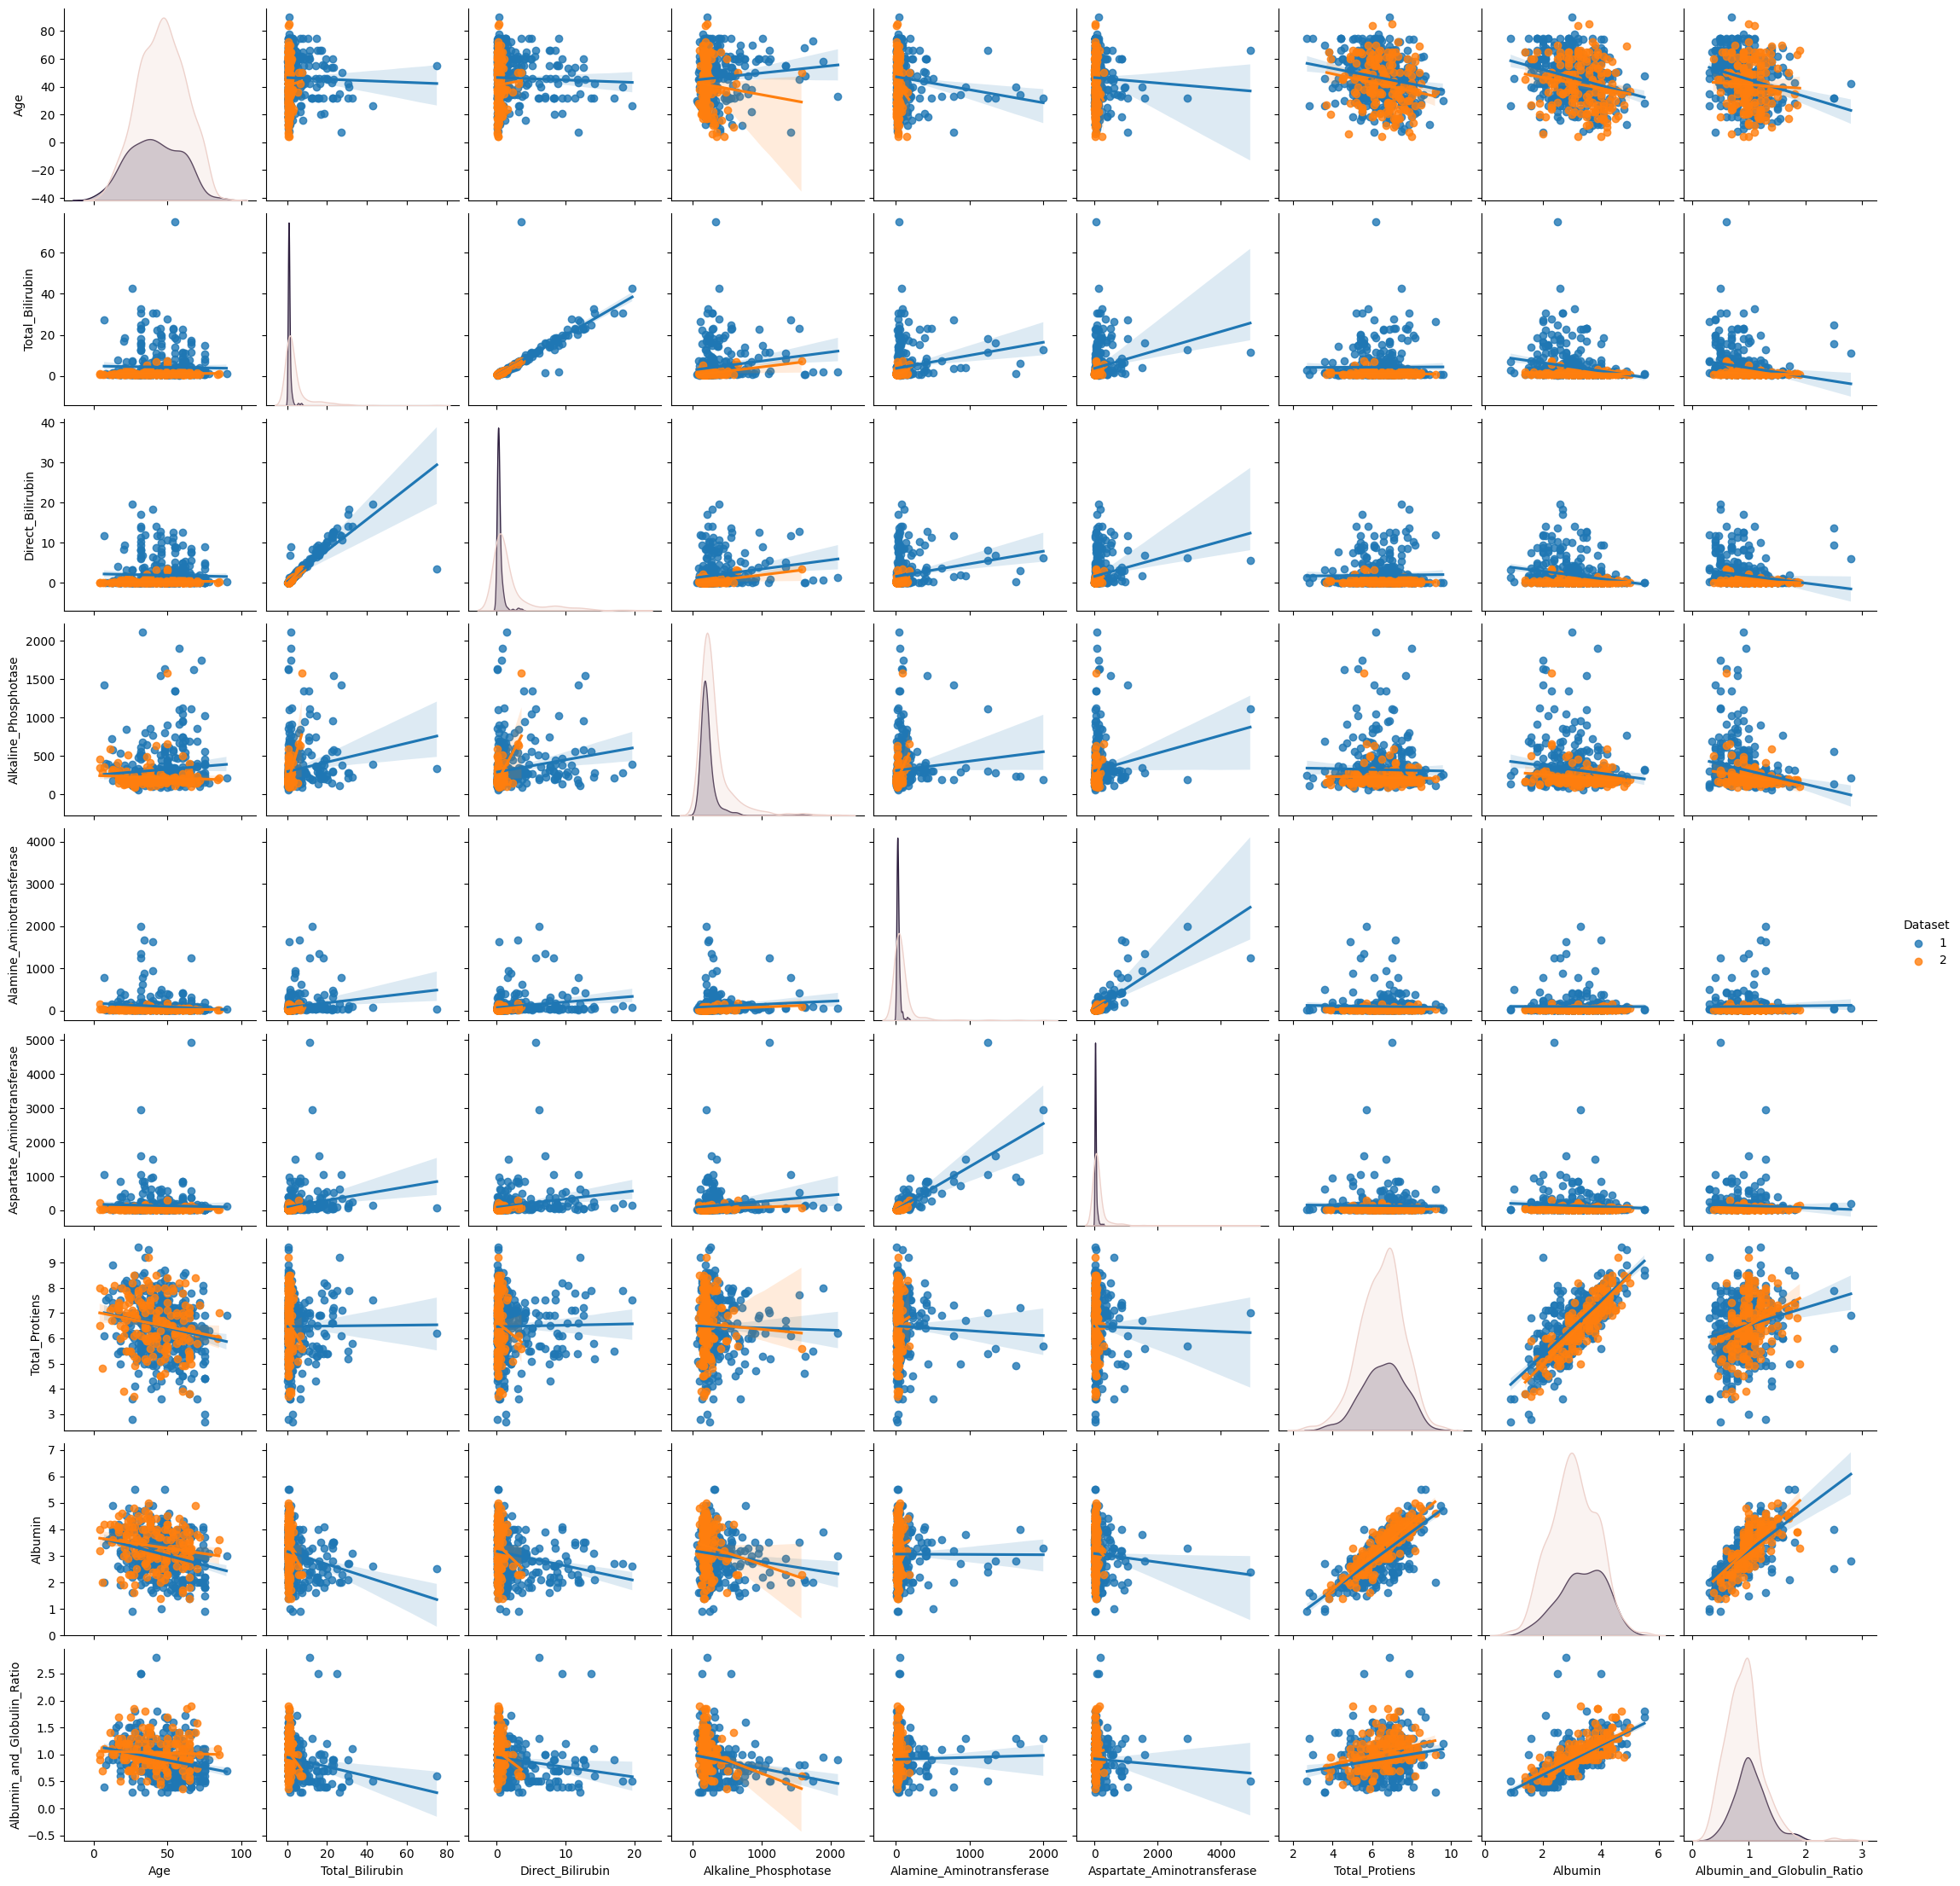

In [34]:
sns.pairplot(liver_df, hue='Dataset', kind='reg')


Based on the correlative pair plots, we find some interesting results directly.

-Positive correlations:

Total Bilirubin and Direct Bilirubin (vice-versa)

Alamine Aminotransferase and Aspartate Aminotransferase (vice-versa)

Total Protein and Albumin (vice-versa)

Albumin and Globulin Ratio and Albumin (vice-versa)

Total Protein and Albumin and Globulin Ration (vice-versa)

-Negative correlations:

Total Protein and age (vice-versa)

Albumin and age (vice-versa)

Albumin and Globulin Ration and age (vice-versa)

Exploring the Distribution of Numerical Features

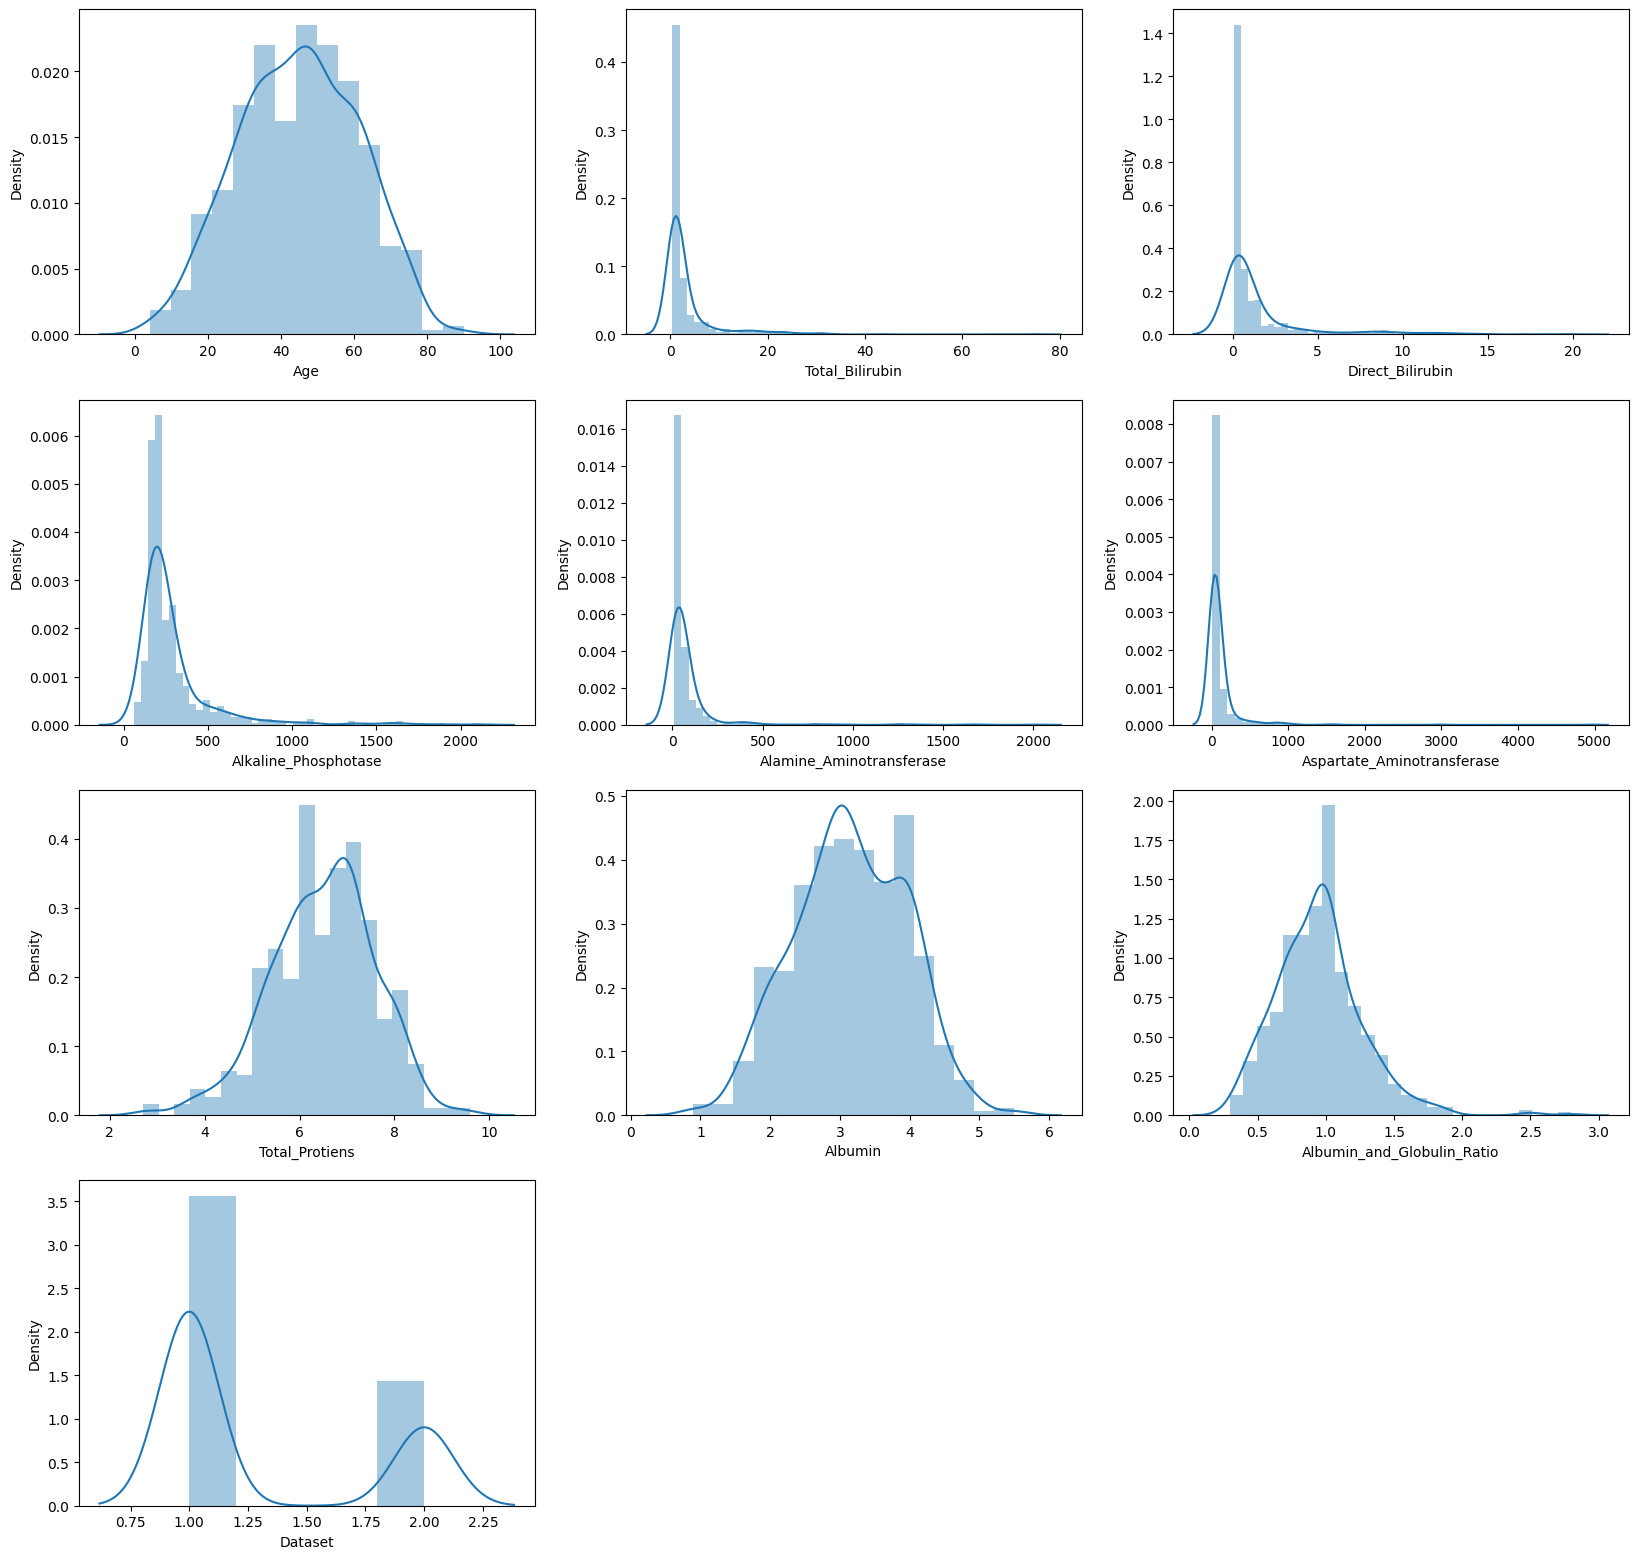

In [33]:
numerical_cols = liver_df.select_dtypes(include='number')
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_cols in numerical_cols:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(liver_df[numerical_cols])
    plt.xlabel(numerical_cols)
    plotnumber+=1
plt.show()

slightly skewed features: albumin_and_globulin_ration

strongly skewed features: total_bilirubin, direct_bilirubin, alkaline_phosphotase, alamine_aminotransferase, aspartate_aminotransferase

Rest Features Are Normally Distributed

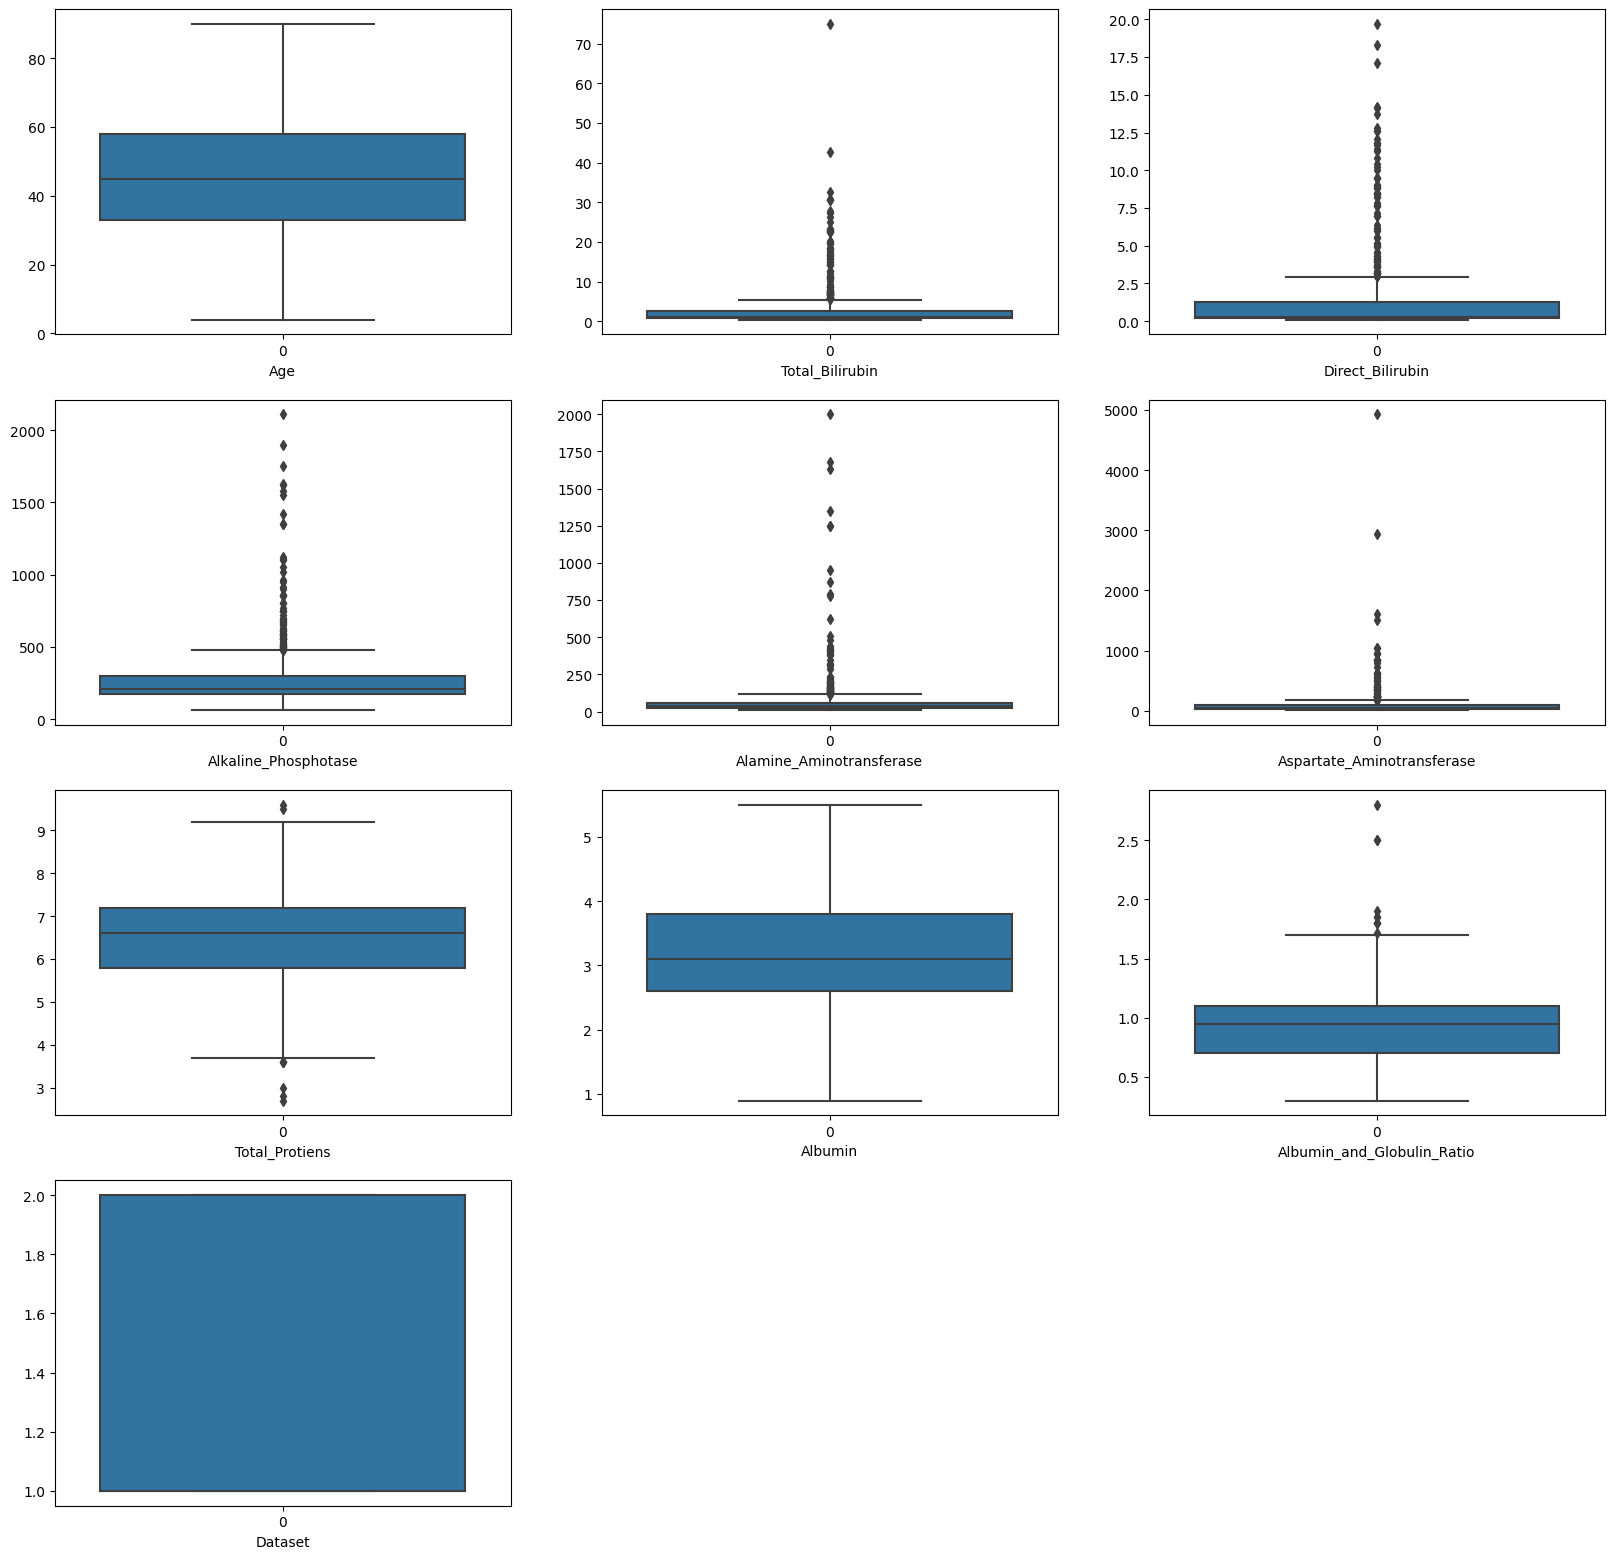

In [36]:
#boxplot on numerical features to find outliers
numerical_cols = liver_df.select_dtypes(include='number')
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_cols in numerical_cols:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(liver_df[numerical_cols])
    plt.xlabel(numerical_cols)
    plotnumber+=1

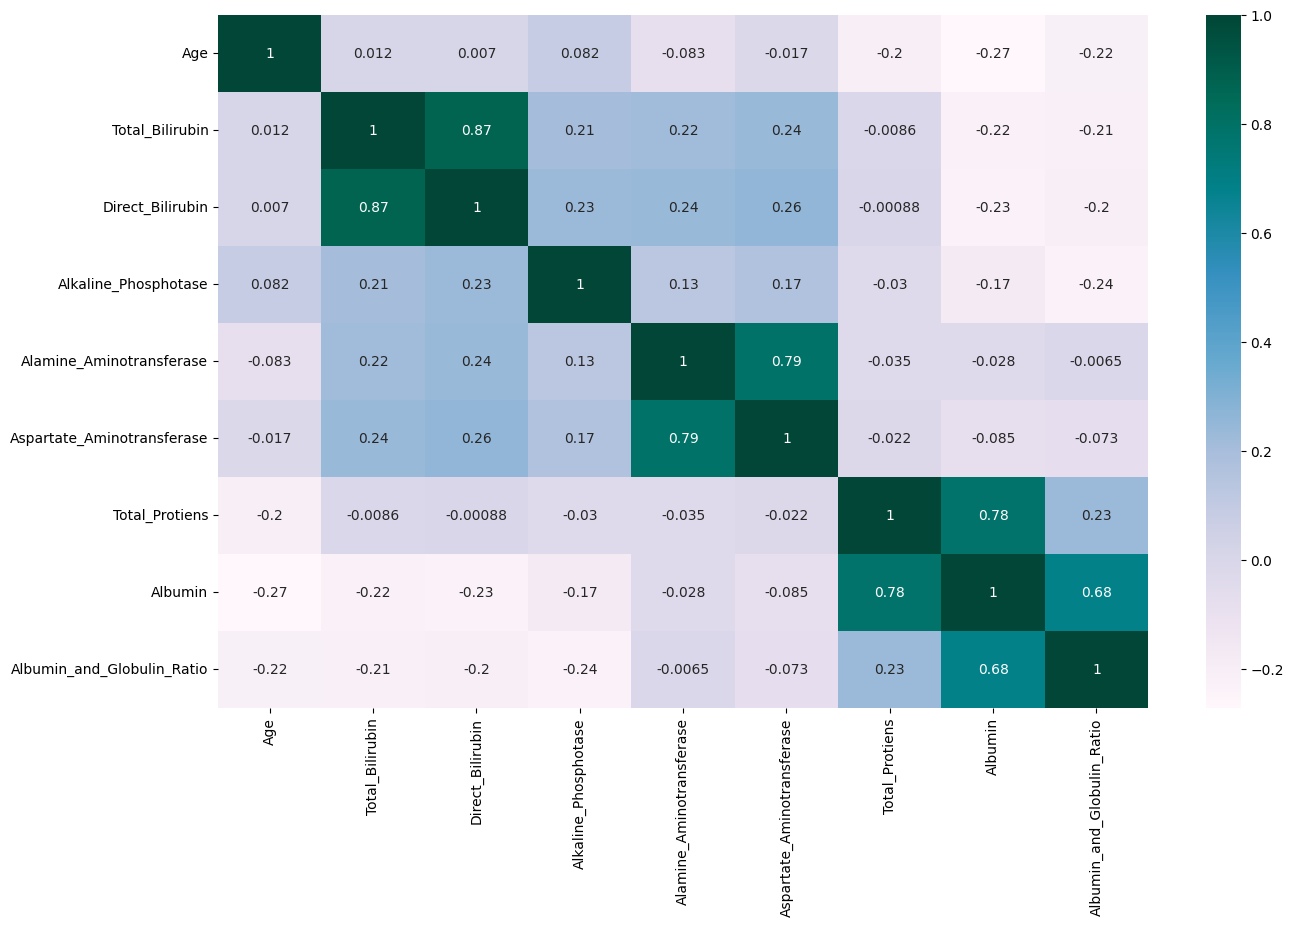

In [37]:
plt.figure(figsize=(15,9))
sns.heatmap(liver_df.drop('Dataset',axis=1).corr(),annot=True,cmap='PuBuGn')
plt.show()

The correlation between Direct_Bilirubin and Total_Bilirubin is high , Alamine_Aminotransferase and Aspartate_Aminotransferase is high, Total_Protiens and Albumin is high, Albumin and Albumin_and_Globulin_Ratio is high


# Encoding

In [38]:
liver_df.Gender=liver_df.Gender.map({'Male':0,'Female':1})


In [39]:
liver_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


# Feature Engineering

In [40]:
x=liver_df.drop(['Dataset'],axis=1)
y=liver_df['Dataset']

Balancing the Target Column

In [41]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [42]:
x_smote, y_smote = smote.fit_resample(x,y)


In [43]:
from collections import Counter  ## counter no.of label for feature
print("Actual Classes",Counter(y))
print("SMOTE Classes",Counter(y_smote))

Actual Classes Counter({1: 406, 2: 164})
SMOTE Classes Counter({1: 406, 2: 406})


Spliting the data

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x_smote, y_smote,test_size=0.25,random_state=42)

# Model Building

# Random Forest

In [45]:
rf=RandomForestClassifier()

In [47]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [48]:
y_pred_rf=rf.predict(x_test)

In [49]:
accuracy_score(y_test,y_pred_rf)

0.7586206896551724

In [50]:
confusion_matrix(y_test,y_pred_rf)

array([[65, 28],
       [21, 89]])

In [51]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           1       0.76      0.70      0.73        93
           2       0.76      0.81      0.78       110

    accuracy                           0.76       203
   macro avg       0.76      0.75      0.76       203
weighted avg       0.76      0.76      0.76       203



# Hyper Parameter RF

In [52]:
param={'n_estimators':[10,50,100,130],'max_depth':[5,10,15],'bootstrap':[True,False]}

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
gsc=GridSearchCV(estimator=rf,
                 param_grid=param,
                 scoring='accuracy')

In [55]:
gsc.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_depth': [5, 10, 15],
                         'n_estimators': [10, 50, 100, 130]},
             scoring='accuracy')

In [56]:
gsc.best_params_

{'bootstrap': False, 'max_depth': 10, 'n_estimators': 50}

In [57]:
gsc.best_score_

0.7684324617260534

In [58]:
y_gsc=gsc.predict(x_test)

In [59]:
accuracy_score(y_test,y_gsc)

0.7931034482758621

In [60]:
confusion_matrix(y_test,y_gsc)

array([[70, 23],
       [19, 91]])

In [61]:
print(classification_report(y_test,y_gsc))

              precision    recall  f1-score   support

           1       0.79      0.75      0.77        93
           2       0.80      0.83      0.81       110

    accuracy                           0.79       203
   macro avg       0.79      0.79      0.79       203
weighted avg       0.79      0.79      0.79       203



# XGBoost

In [62]:
xg=XGBClassifier()

In [70]:
y = np.where(y == 1, 0, y)
y = np.where(y == 2, 1, y)


In [73]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,

In [74]:
x_smote, y_smote = smote.fit_resample(x,y)


In [75]:
x_train,x_test,y_train,y_test=train_test_split(x_smote, y_smote,test_size=0.25,random_state=42)

In [76]:
xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [77]:
y_pred_xg=xg.predict(x_test)

In [78]:
accuracy_score(y_test,y_pred_xg)

0.7931034482758621

In [79]:
confusion_matrix(y_test,y_pred_xg)

array([[69, 24],
       [18, 92]])

In [80]:
print(classification_report(y_test,y_pred_xg))

              precision    recall  f1-score   support

           0       0.79      0.74      0.77        93
           1       0.79      0.84      0.81       110

    accuracy                           0.79       203
   macro avg       0.79      0.79      0.79       203
weighted avg       0.79      0.79      0.79       203



# Hyper Parameter XGB

In [81]:
xgbparam={'learning_rate': [0.5, 0.1, 0.01, 0.001],
            'max_depth': [3, 5, 10, 20],
            'n_estimators': [10, 50, 100, 200]}

In [82]:
gsc=GridSearchCV(estimator=xg,
                 param_grid=xgbparam,
                 scoring='accuracy')

In [87]:
gsc.fit(x_train,y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.5, 0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 10, 20],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy')

In [88]:
gsc.best_params_

{'learning_rate': 0.5, 'max_depth': 20, 'n_estimators': 100}

In [89]:
gsc.best_score_

0.7717382468500202